# Seattle Library Data

**Aufgabe**: <br/>

Seattle Library Datenanalyse: Die Library von Seattle veröffentlicht vorbildlich einige ihrer gesammelten Daten. Wir haben hier ein kleines Beispiel zusammengestellt, in dem Teile der Daten heruntergeladen werden, in einen Pandas-DataFrame geladen werden und dann analysiert werden. Darin könnt ihr noch ein paar weitere Funktionalitäten von pandas entdecken.

Erstellt ein neues Jupyter Notebook und überlegt euch für die Aufgabe drei Fragen, die ihr mittels einer Analyse mit Pandas auf die Daten anwenden könnt. Visualisiert eure Analysen durch tabellarische Form oder ein Histogramm.

**Datasets**:

* [Checkouts by Title](https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6)
* [Library Collection Inventory](https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf)

**API-dokumenation**:
* Paging through Data https://dev.socrata.com/docs/queries/
* Queries using SODA https://dev.socrata.com/docs/paging.html

In [1]:
%matplotlib inline

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

from io import StringIO
from pathlib import Path

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Checkout Data Analysis 2012-2021

In [2]:
def load_data(start_year=2012, end_year=2013, start_month=2, end_month=4, limit=1000,
              filename='temp_data.csv'):
    """
    Helper function to download csv datasets for a range of `years`,
    and `months`. By using the argument `limit` limit the count of 
    data entries per year
    """
    # Create pd.DataFrame to store csv data
    df = pd.DataFrame()

    # Iterate through years and months and load csv data
    for year in range(start_year, (end_year + 1)):
        for month in range(start_month, (end_month + 1)):
            url = f"https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear={year}&checkoutmonth={month}&$limit={limit}"
            print(f'Loading csv data for {month}/{year} from: {url}')
            csv_content = urllib.request.urlopen(url).read().decode('utf-8')
            temp_df = pd.read_csv(StringIO(csv_content))
            df = pd.concat([df, temp_df], ignore_index=True)

    # Save DF to disk as csv
    print(f'Saving csv as {filename}')
    df.to_csv(filename, index=False)

- Get library checkout data from the years **2012 to 2021**
- Limit data entries for each year to **20,000** and set the month to **March** to make each year comparable
- Concat each year to a `pd.DataFrame`
- Save the complete DataFrame as `csv`

In [3]:
load_data(start_year=2012, end_year=2021, start_month=3, end_month=3, 
          limit=20000, filename='2012-21_seattlelib_checkouts.csv')

Loading csv data for 3/2012 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2012&checkoutmonth=3&$limit=20000
Loading csv data for 3/2013 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2013&checkoutmonth=3&$limit=20000
Loading csv data for 3/2014 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2014&checkoutmonth=3&$limit=20000
Loading csv data for 3/2015 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2015&checkoutmonth=3&$limit=20000
Loading csv data for 3/2016 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2016&checkoutmonth=3&$limit=20000
Loading csv data for 3/2017 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2017&checkoutmonth=3&$limit=20000
Loading csv data for 3/2018 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&checkoutmonth=3&$limit=20000
Loading csv data for 3/2019 from: https://data.s

## Analysis

In [4]:
# Read csv
checkout_df = pd.read_csv(Path('./2012-21_seattlelib_checkouts.csv'))

In [5]:
checkout_df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,Freegal,SONG,2012,3,1,Jagadananda Karaka,NaN,E. Gayatri,NaN,NaN,NaN
1,Physical,Horizon,BOOK,2012,3,2,Puddles,NaN,NaN,Rain and rainfall Fiction,NaN,NaN
2,Digital,Freegal,SONG,2012,3,1,The Call Up,NaN,The Clash,NaN,NaN,NaN
3,Physical,Horizon,BOOK,2012,3,1,empty copper sea,NaN,NaN,Large type books,NaN,NaN
4,Digital,Freegal,SONG,2012,3,1,Any Day Now,NaN,Elvis Presley,NaN,NaN,NaN


Check if monthly distribution of data entries is correct, i.e. **only** month of March is present

In [6]:
checkout_df['checkoutmonth'].value_counts()

checkoutmonth
3    200000
Name: count, dtype: int64

In [7]:
checkout_df.shape

(200000, 12)

In [8]:
checkout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   usageclass       200000 non-null  object 
 1   checkouttype     200000 non-null  object 
 2   materialtype     200000 non-null  object 
 3   checkoutyear     200000 non-null  int64  
 4   checkoutmonth    200000 non-null  int64  
 5   checkouts        200000 non-null  int64  
 6   title            200000 non-null  object 
 7   isbn             0 non-null       float64
 8   creator          164648 non-null  object 
 9   subjects         190133 non-null  object 
 10  publisher        181073 non-null  object 
 11  publicationyear  178468 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 18.3+ MB


### Improve memory usage

In [9]:
def improve_memory_usage(df):
    # Convert columns to appropriate dtypes
    df['usageclass'] = df['usageclass'].astype('category')
    df['checkouttype'] = df['checkouttype'].astype('category')
    df['checkoutmonth'] = df['checkoutmonth'].astype('int8')
    df['checkouts'] = df['checkouts'].astype('int16')
    df['checkoutyear'] = df['checkoutyear'].astype('int16')
    return df

# Check for num of unique values
print(checkout_df['usageclass'].unique())
print(checkout_df['checkouttype'].unique())

checkout_df = improve_memory_usage(checkout_df)

['Digital' 'Physical']
['Freegal' 'Horizon' 'OverDrive' 'Hoopla' 'Zinio']


In [10]:
checkout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   usageclass       200000 non-null  category
 1   checkouttype     200000 non-null  category
 2   materialtype     200000 non-null  object  
 3   checkoutyear     200000 non-null  int16   
 4   checkoutmonth    200000 non-null  int8    
 5   checkouts        200000 non-null  int16   
 6   title            200000 non-null  object  
 7   isbn             0 non-null       float64 
 8   creator          164648 non-null  object  
 9   subjects         190133 non-null  object  
 10  publisher        181073 non-null  object  
 11  publicationyear  178468 non-null  object  
dtypes: category(2), float64(1), int16(2), int8(1), object(6)
memory usage: 12.0+ MB


### **Statistics and Distributions**

#### Frequency distribution by `materialtype` (books, ebooks, audiobooks etc.)

In [11]:
checkout_df['materialtype'].value_counts()[:10]

materialtype
BOOK          94230
EBOOK         41718
SOUNDDISC     17848
VIDEODISC     17355
AUDIOBOOK     16562
SONG           7885
MUSIC          1507
MOVIE           745
TELEVISION      515
VIDEO           254
Name: count, dtype: int64

In [13]:
# All available *materialtype*s in dataset
checkout_df['materialtype'].unique()

array(['SONG', 'BOOK', 'SOUNDDISC', 'VIDEODISC', 'VIDEO', 'MIXED', 'CR',
       'EBOOK', 'AUDIOBOOK', 'MUSIC', 'ER', 'ER, VIDEODISC', 'VISUAL',
       'VIDEOCASS', 'ER, SOUNDDISC', 'SOUNDDISC, VIDEODISC', 'SOUNDCASS',
       'MAP', 'SOUNDREC', 'ATLAS', 'MUSICSNDREC', 'KIT', 'MOVIE',
       'MAGAZINE', 'TELEVISION', 'FLASHCARD, SOUNDDISC',
       'SLIDE, SOUNDCASS, VIDEOCASS', 'REGPRINT', 'LARGEPRINT', 'COMIC',
       'VIDEOREC', 'SOUNDDISC, SOUNDREC', 'VIDEOCART', 'MICROFORM',
       'GLOBE', 'REGPRINT, SOUNDDISC', 'SOUNDDISC, VIDEOCASS',
       'UNSPECIFIED'], dtype=object)

#### Top 10 titles with most checkouts for all years

In [15]:
checkout_df.sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
167332,EBOOK,2020,There There: A Novel,Tommy Orange,1270
136303,MIXED,2018,In Building Device Checkout,NaN,1195
147649,BOOK,2019,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane",509
141859,BOOK,2019,The library book / Susan Orlean.,"Orlean, Susan",507
112615,MAGAZINE,2017,The Economist,NaN,457
68413,VIDEODISC,2015,Boyhood [videorecording] / IFC Films ; IFC Pro...,NaN,450
107708,MAGAZINE,2017,The New Yorker,NaN,399
102932,VIDEODISC,2017,Manchester by the Sea / Lionsgate ; Amazon Stu...,NaN,398
27119,VIDEODISC,2013,Moonrise kingdom [videorecording] / Focus Feat...,NaN,397
66272,VIDEODISC,2015,Guardians of the galaxy [videorecording] / Mar...,NaN,375


#### `Books` with more than 100 checkouts across all years

In [16]:
# First 10 of subset
checkout_df[(checkout_df['checkouts'] > 100) & (checkout_df['materialtype'] == 'BOOK')].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
147649,BOOK,2019,Nine perfect strangers / Liane Moriarty.,"Moriarty, Liane",509
141859,BOOK,2019,The library book / Susan Orlean.,"Orlean, Susan",507
149499,BOOK,2019,An anonymous girl / Greer Hendricks and Sarah ...,"Hendricks, Greer",369
135044,BOOK,2018,Ready player one / Ernest Cline.,"Cline, Ernest",367
157586,BOOK,2019,The truths we hold : an American journey / Kam...,"Harris, Kamala D.",367
159237,BOOK,2019,Golden State / Ben H. Winters.,"Winters, Ben H.",333
186365,BOOK,2021,Keep sharp : build a better brain at any age /...,"Gupta, Sanjay, 1969-",326
158933,BOOK,2019,Heavy : an American memoir / Kiese Laymon.,"Laymon, Kiese",280
191585,BOOK,2021,Modern comfort food : a Barefoot Contessa cook...,"Garten, Ina",280
27244,BOOK,2013,Tenth of December : stories / George Saunders.,"Saunders, George, 1958-",215


#### `Ebooks` with more than 100 checkouts across all years

In [17]:
# First 10 of subset
checkout_df[(checkout_df['checkouts'] > 100) & (checkout_df['materialtype'] == 'EBOOK')].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
167332,EBOOK,2020,There There: A Novel,Tommy Orange,1270
127781,EBOOK,2018,The Underground Railroad (Oprah's Book Club): ...,Colson Whitehead,263
86148,EBOOK,2016,All the Light We Cannot See: A Novel,Anthony Doerr,214
170686,EBOOK,2020,Such a Fun Age,Kiley Reid,202
194468,EBOOK,2021,Circe,Madeline Miller,182
141283,EBOOK,2019,The Witch Elm: A Novel,Tana French,180
193612,EBOOK,2021,Big Summer: A Novel,Jennifer Weiner,174
62587,EBOOK,2015,"The Cuckoo's Calling: Cormoran Strike Series, ...",Robert Galbraith,164
191843,EBOOK,2021,Leave the World Behind: A Novel,Rumaan Alam,159
193947,EBOOK,2021,"The Law of Innocence: Mickey Haller Series, Bo...",Michael Connelly,157


#### `Audiobooks` with more than 100 checkouts across all years

In [18]:
# First 10 of subset
checkout_df[(checkout_df['checkouts'] > 100) & (checkout_df['materialtype'] == 'AUDIOBOOK')].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
191596,AUDIOBOOK,2021,The Vanishing Half: A Novel (unabridged) (Unab...,Brit Bennett,348
150965,AUDIOBOOK,2019,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,313
174576,AUDIOBOOK,2020,Where the Crawdads Sing (Unabridged),Delia Owens,256
178158,AUDIOBOOK,2020,Educated: A Memoir (unabridged) (Unabridged),Tara Westover,244
190214,AUDIOBOOK,2021,Harry Potter and the Chamber of Secrets: Harry...,J. K. Rowling,211
176444,AUDIOBOOK,2020,"Crazy Rich Asians: Crazy Rich Asians Series, B...",Kevin Kwan,203
182477,AUDIOBOOK,2021,The Queen's Gambit (Unabridged),Walter Tevis,168
181270,AUDIOBOOK,2021,"Dear Girls: Intimate Tales, Untold Secrets & A...",Ali Wong,151
161366,AUDIOBOOK,2020,"A Wrinkle In Time: Time Quartet, Book 1 (unabr...",Madeleine L'engle,149
128474,AUDIOBOOK,2018,Little Fires Everywhere (Unabridged),Celeste Ng,137


#### `Movies` top 10 across all years

In [19]:
# First 10 of subset
checkout_df[checkout_df['materialtype'] == 'MOVIE'].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
124201,MOVIE,2018,Four Weddings And A Funeral,NaN,39
122747,MOVIE,2018,My Friend Dahmer,NaN,34
91717,MOVIE,2016,August: Osage County,NaN,33
75858,MOVIE,2015,Six Degrees Of Separation,NaN,26
108628,MOVIE,2017,Sunshine Cleaning,NaN,20
119908,MOVIE,2017,Fishing Naked,NaN,18
23444,MOVIE,2013,Bernie,NaN,18
106286,MOVIE,2017,A Fish Called Wanda,NaN,17
123726,MOVIE,2018,Discreet,NaN,16
113631,MOVIE,2017,Just Friends,NaN,15


#### `Sounddisc` top 10 across all years

In [20]:
# First 10 of subset
checkout_df[checkout_df['materialtype'] == 'SOUNDDISC'].sort_values(by='checkouts', ascending=False)[['materialtype', 'checkoutyear', 'title', 'creator', 'checkouts']].head(10)

,materialtype,checkoutyear,title,creator,checkouts
24412,SOUNDDISC,2013,The heist [sound recording] / Macklemore & Rya...,"Macklemore, 1983-",154
14511,SOUNDDISC,2012,Ceremonials [sound recording] / Florence + the...,Florence + the Machine,153
46770,SOUNDDISC,2014,Reflektor [sound recording] / Arcade Fire.,Arcade Fire (Musical group),145
54425,SOUNDDISC,2014,Vs. (redux) [sound recording] / Macklemore ; R...,"Macklemore, 1983-",122
53853,SOUNDDISC,2014,Prism [sound recording] / Katy Perry.,"Perry, Katy",98
5469,SOUNDDISC,2012,The Head and the Heart [sound recording].,Head and the Heart (Musical group),86
59142,SOUNDDISC,2014,2014 Grammy nominees [sound recording].,NaN,72
80596,SOUNDDISC,2016,To pimp a butterfly [sound recording] / Kendri...,"Lamar, Kendrick, 1987-",71
23254,SOUNDDISC,2013,Love this giant [sound recording] / David Byrn...,"Byrne, David, 1952-",70
154953,SOUNDDISC,2019,Weezer.,Weezer (Musical group),66


#### Overall top 10 most checked out `creators` across all years and mediatypes

In [21]:
checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10]

creator
Seuss, Dr.                   1880
Willems, Mo                  1504
Meadows, Daisy               1418
Osborne, Mary Pope           1408
Davis, Jim, 1945 July 28-    1312
Tommy Orange                 1270
Stilton, Geronimo            1156
Michael Connelly             1061
James Patterson              1039
Holm, Jennifer L.             847
Name: checkouts, dtype: int16

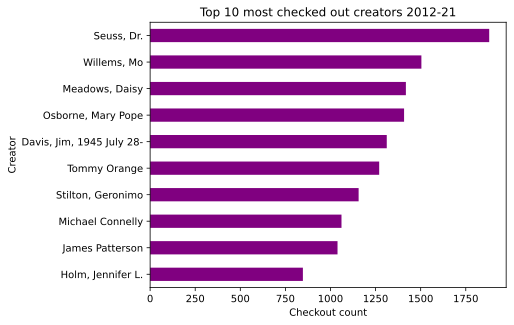

In [22]:
top10creators = checkout_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10].sort_values()

ax = top10creators.plot(kind='barh', color='purple')
plt.xlabel('Checkout count')
plt.ylabel('Creator')
plt.title('Top 10 most checked out creators 2012-21')

plt.show()

#### Yearly checkouts for overall top 3 `creators`

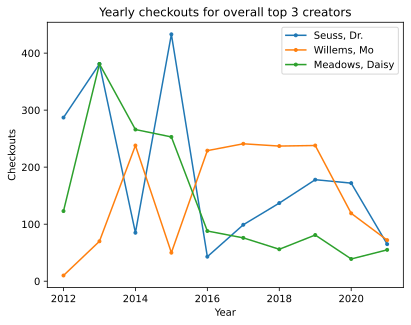

In [23]:
seuss_data = checkout_df[checkout_df['creator'] == 'Seuss, Dr.'].groupby('checkoutyear')['checkouts'].sum()
willems_data = checkout_df[checkout_df['creator'] == 'Willems, Mo'].groupby('checkoutyear')['checkouts'].sum()
meadows_data = checkout_df[checkout_df['creator'] == 'Meadows, Daisy'].groupby('checkoutyear')['checkouts'].sum()


plt.plot(seuss_data, label='Seuss, Dr.', marker='.')
plt.plot(willems_data, label='Willems, Mo', marker='.')
plt.plot(meadows_data, label='Meadows, Daisy', marker='.')
plt.xlabel('Year')
plt.ylabel('Checkouts')
plt.title('Yearly checkouts for overall top 3 creators')
plt.legend()
plt.show()

#### Yearly checkouts per `usageclass` type

In [24]:
checkout_df.groupby('checkoutyear')['usageclass'].value_counts()

checkoutyear  usageclass
2012          Physical      16278
              Digital        3722
2013          Physical      15796
              Digital        4204
2014          Physical      14696
              Digital        5304
2015          Physical      13284
              Digital        6716
2016          Physical      12846
              Digital        7154
2017          Physical      12634
              Digital        7366
2018          Physical      12004
              Digital        7996
2019          Physical      12824
              Digital        7176
2020          Physical      11205
              Digital        8795
2021          Digital       10544
              Physical       9456
Name: count, dtype: int64

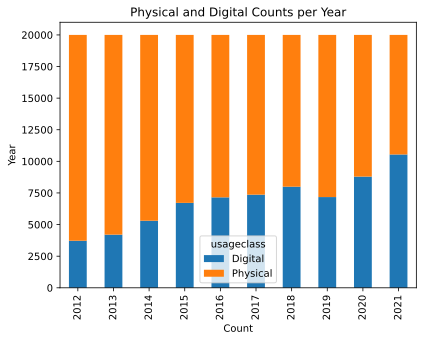

In [25]:
plot_data = checkout_df.groupby('checkoutyear')['usageclass'].value_counts().unstack()

ax = plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Physical and Digital Counts per Year')

plt.show()

#### Frequency distribution for `materialtype`

In [26]:
checkout_df.groupby('checkoutyear')['materialtype'].value_counts()

checkoutyear  materialtype        
2012          BOOK                    11497
              SOUNDDISC                2616
              EBOOK                    2076
              VIDEODISC                1933
              AUDIOBOOK                 780
                                      ...  
2021          SOUNDDISC, VIDEOCASS        1
              MIXED                       1
              MAP                         1
              UNSPECIFIED                 1
              ER, VIDEODISC               1
Name: count, Length: 224, dtype: int64

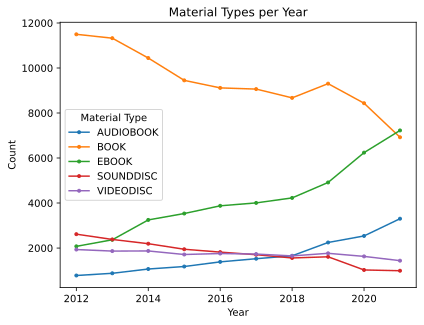

In [27]:
search_mtypes = ['BOOK',
                'SOUNDDISC',
                'EBOOK',
                'AUDIOBOOK',
                'VIDEODISC']

mtypes_df = checkout_df[checkout_df['materialtype'].isin(search_mtypes)]
mtypes_plot_data = mtypes_df.groupby('checkoutyear')['materialtype'].value_counts().unstack()

mtypes_plot_data.plot(marker='.', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Material Types per Year')
plt.legend(title='Material Type')

plt.show()

# Checkout Data Analysis 2021

- Get library checkout data for the **whole year of 2021**
- Limit data entries per month to **20,000**
- Concat each year to a `pd.DataFrame`
- Save the complete DataFrame as `csv`

In [28]:
load_data(start_year=2021, end_year=2021, start_month=1, end_month=12,
          limit=20000, filename='2021_seattle_lib_checkouts.csv')

Loading csv data for 1/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=1&$limit=20000
Loading csv data for 2/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=2&$limit=20000
Loading csv data for 3/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=3&$limit=20000
Loading csv data for 4/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=4&$limit=20000
Loading csv data for 5/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=5&$limit=20000
Loading csv data for 6/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=6&$limit=20000
Loading csv data for 7/2021 from: https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2021&checkoutmonth=7&$limit=20000
Loading csv data for 8/2021 from: https://data.s

## Analysis

In [29]:
# Read csv
checkouts2021_df = pd.read_csv('2021_seattle_lib_checkouts.csv')

In [30]:
checkouts2021_df.head()

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2021,1,1,California: A History,NaN,Kevin Starr,"History, Nonfiction, Reference","Random House, Inc.",2010
1,Digital,OverDrive,EBOOK,2021,1,2,Agnes Grey,NaN,Anne Brontë,"Classic Literature, Fiction",Duke Classics,2020
2,Digital,OverDrive,EBOOK,2021,1,12,Tailspin,NaN,Sandra Brown,"Fiction, Romance, Suspense, Thriller","Hachette Digital, Inc.",2018
3,Digital,OverDrive,EBOOK,2021,1,1,Unleashed,NaN,Laurien Berenson,"Fiction, Mystery",Lightning Source Inc,2016
4,Physical,Horizon,BOOK,2021,1,1,The stoic / Theodore Dreiser.,NaN,"Dreiser, Theodore, 1871-1945",NaN,"World Pub. Co.,",[1947]


In [31]:
# Check if every month is present and evenly distributed
checkouts2021_df['checkoutmonth'].value_counts()

checkoutmonth
1     20000
2     20000
3     20000
4     20000
5     20000
6     20000
7     20000
8     20000
9     20000
10    20000
11    20000
12    20000
Name: count, dtype: int64

In [32]:
checkouts2021_df.shape

(240000, 12)

### Improve memory usage

In [33]:
checkouts2021_df = improve_memory_usage(checkouts2021_df)

In [34]:
checkouts2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   usageclass       240000 non-null  category
 1   checkouttype     240000 non-null  category
 2   materialtype     240000 non-null  object  
 3   checkoutyear     240000 non-null  int16   
 4   checkoutmonth    240000 non-null  int8    
 5   checkouts        240000 non-null  int16   
 6   title            240000 non-null  object  
 7   isbn             0 non-null       float64 
 8   creator          218514 non-null  object  
 9   subjects         238786 non-null  object  
 10  publisher        239574 non-null  object  
 11  publicationyear  239516 non-null  object  
dtypes: category(2), float64(1), int16(2), int8(1), object(6)
memory usage: 14.4+ MB


### **Statistics and Distributions**

#### Frequency distribution by `materialtype` (books, ebooks, audiobooks etc.)

In [35]:
checkouts2021_df['materialtype'].value_counts()[:10]

materialtype
BOOK                    89497
EBOOK                   82352
AUDIOBOOK               38702
VIDEODISC               16064
SOUNDDISC               11884
REGPRINT                  572
MUSIC                     289
SOUNDDISC, VIDEODISC      125
VIDEO                     119
LARGEPRINT                108
Name: count, dtype: int64

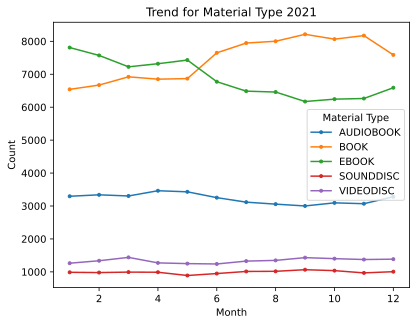

In [36]:
search_mtypes = ['BOOK',
                'SOUNDDISC',
                'EBOOK',
                'AUDIOBOOK',
                'VIDEODISC']

mtypes_df = checkouts2021_df[checkouts2021_df['materialtype'].isin(search_mtypes)]
mtypes_plot_data = mtypes_df.groupby('checkoutmonth')['materialtype'].value_counts().unstack()

mtypes_plot_data.plot(marker='.', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Trend for Material Type 2021')
plt.legend(title='Material Type')

plt.show()

#### Top 10 `titles` with most checkouts across all months

In [37]:
checkouts2021_df.groupby(['materialtype', 'creator', 'title'])['checkouts'].sum().sort_values(ascending=False)[:10]

materialtype  creator                title                                                                                
AUDIOBOOK     Malcolm Gladwell       Talking to Strangers: What We Should Know about the People We Don't Know (unabridged)    1049
EBOOK         Brit Bennett           The Vanishing Half: A Novel                                                               898
              S. F. Kosa             The Quiet Girl                                                                            856
BOOK          Zauner, Michelle       Crying in H Mart : a memoir / Michelle Zauner.                                            762
              Gupta, Sanjay, 1969-   Keep sharp : build a better brain at any age / Sanjay Gupta with Kristin Loberg.          743
EBOOK         Andy Weir              Project Hail Mary: A Novel                                                                728
AUDIOBOOK     Lucy Foley             The Guest List: A Novel (unabridged)                  

#### Overall top 10 most checked out `creators` across all months and mediatypes

In [38]:
checkouts2021_df.groupby('creator')['checkouts'].sum().sort_values(ascending=False)[:10]

creator
Willems, Mo         2232
James Patterson     2184
Agatha Christie     1892
Julia Quinn         1849
Louise Penny        1830
Malcolm Gladwell    1810
Jeff Kinney         1756
Stephen King        1717
John Grisham        1675
Michael Connelly    1632
Name: checkouts, dtype: int16

#### Checkout trend for top 3 `creators` across all months

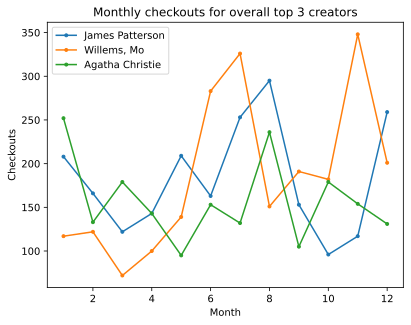

In [39]:
patterson_data = checkouts2021_df[checkouts2021_df['creator'] == 'James Patterson'].groupby('checkoutmonth')['checkouts'].sum()
willems_data = checkouts2021_df[checkouts2021_df['creator'] == 'Willems, Mo'].groupby('checkoutmonth')['checkouts'].sum()
christie_data = checkouts2021_df[checkouts2021_df['creator'] == 'Agatha Christie'].groupby('checkoutmonth')['checkouts'].sum()

plt.plot(patterson_data, label='James Patterson', marker='.')
plt.plot(willems_data, label='Willems, Mo', marker='.')
plt.plot(christie_data, label='Agatha Christie', marker='.')
plt.xlabel('Month')
plt.ylabel('Checkouts')
plt.title('Monthly checkouts for overall top 3 creators')
plt.legend()

plt.show()

#### Monthly checkouts per `usageclass` type

In [40]:
checkouts2021_df.groupby('checkoutmonth')['usageclass'].value_counts()

checkoutmonth  usageclass
1              Digital       11122
               Physical       8878
2              Digital       10922
               Physical       9078
3              Digital       10544
               Physical       9456
4              Digital       10788
               Physical       9212
5              Digital       10872
               Physical       9128
6              Digital       10043
               Physical       9957
7              Physical      10389
               Digital        9611
8              Physical      10479
               Digital        9521
9              Physical      10816
               Digital        9184
10             Physical      10656
               Digital        9344
11             Physical      10654
               Digital        9346
12             Physical      10124
               Digital        9876
Name: count, dtype: int64

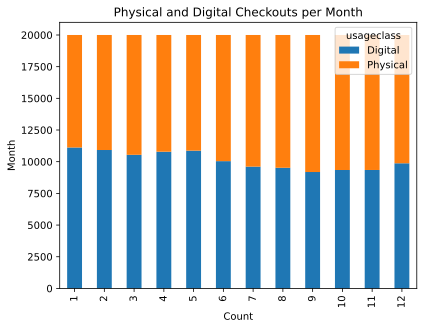

In [41]:
plot_data = checkouts2021_df.groupby('checkoutmonth')['usageclass'].value_counts().unstack()

ax = plot_data.plot(kind='bar', stacked=True)
plt.xlabel('Count')
plt.ylabel('Month')
plt.title('Physical and Digital Checkouts per Month')

plt.show()